In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn import tree
from graphviz import Digraph
from sklearn.metrics import roc_curve, auc

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

%matplotlib inline
from pandas import DataFrame
from sklearn import metrics

/Users/Singsing/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('finaltext.csv')

In [3]:
columns = list(df)

In [4]:
columns.remove('company')

In [5]:
columns.remove('suspend')

In [6]:
columns.remove('symbol')

In [7]:
X = df[columns]
Y = df.suspend
Y = np.ravel(Y)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print len(X_train), len(Y_train), len(X_test), len(Y_test)

181 181 78 78


In [9]:
log_reg = LogisticRegression()
rand_for = RandomForestClassifier()
dec_tree = DecisionTreeClassifier()
bag_class = BaggingClassifier()
naive_bay = GaussianNB()
k_near_n = KNeighborsClassifier()

logistic regression

In [10]:
log_reg_RFE = RFE(log_reg, 20)
log_reg_RFE.fit(X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_train)

log_reg_RFE_df = pd.DataFrame()

log_reg_RFE_df['Rank'] = log_reg_RFE.ranking_
log_reg_RFE_df['Feature'] = X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']].columns
log_reg_RFE_df['Support'] = log_reg_RFE.support_
LGdf = log_reg_RFE_df[log_reg_RFE_df.Support == True]
#LG20 = LGdf['Feature'].tolist()


In [11]:
log_reg_RFE.score(X_test[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_test)

0.74358974358974361

In [12]:
print 'Logistic Regression model accuracy: ' + str(log_reg_RFE.score(X_test[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_test))

Logistic Regression model accuracy: 0.74358974359


In [13]:
log_reg_export = pd.DataFrame(log_reg_RFE.predict_proba(X[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']]))
log_reg_export['company'] = df.company
log_reg_export['symbol'] = df.symbol
log_reg_export['suspend'] = df.suspend
log_reg_export

,0,1,company,symbol,suspend
0,2.746251e-01,0.725375,OXiGENE,OXGN,1
1,7.193636e-02,0.928064,PendrellCorporation,PCO,1
2,1.095979e-01,0.890402,PhotoMedex,PHMD,1
3,2.666088e-01,0.733391,PrimaBioMedLtd,PBMD,1
4,1.267290e-01,0.873271,PrismTechnologiesGroup,PRZM,1
5,3.435485e-03,0.996565,ProfessionalDiversityNetwork,IPDN,1
6,1.888609e-01,0.811139,QKLStores,QKLS,1
7,3.403549e-01,0.659645,QualstarCorporation,QBAK,1
8,9.322382e-02,0.906776,QuestResourceHoldingCorporation,QRHC,1
9,4.632014e-01,0.536799,RadaElectronicsIndustriesLimited,RADA,1


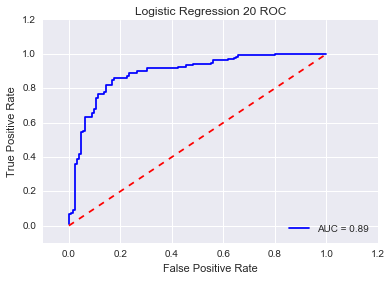

In [14]:
actual = log_reg_export.suspend
pred = log_reg_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Logistic Regression 20 ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree

In [15]:
dec_tree_RFE = RFE(dec_tree, 20)
dec_tree_RFE.fit(X_train[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_requested',
 'Concept_increased',
 'Concept_failed',
 'Concept_net',
 'Concept_estimate',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']], Y_train)

dec_tree_RFE_df = pd.DataFrame()

dec_tree_RFE_df['Rank'] = dec_tree_RFE.ranking_
dec_tree_RFE_df['Feature'] = X_train[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_requested',
 'Concept_increased',
 'Concept_failed',
 'Concept_net',
 'Concept_estimate',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']].columns
dec_tree_RFE_df['Support'] = dec_tree_RFE.support_
DT20df = dec_tree_RFE_df[dec_tree_RFE_df.Support == True]
DT20 = DT20df['Feature'].tolist()
DT20

['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_requested',
 'Concept_increased',
 'Concept_failed',
 'Concept_net',
 'Concept_estimate',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']

In [16]:
print 'Decision Tree model accuracy: ' + str(dec_tree_RFE.score(X_test[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_requested',
 'Concept_increased',
 'Concept_failed',
 'Concept_net',
 'Concept_estimate',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']], Y_test))

Decision Tree model accuracy: 0.692307692308


In [17]:
log_dec_export = pd.DataFrame(dec_tree_RFE.predict_proba(X[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_requested',
 'Concept_increased',
 'Concept_failed',
 'Concept_net',
 'Concept_estimate',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']]))
log_dec_export['company'] = df.company
log_dec_export['symbol'] = df.symbol
log_dec_export['suspend'] = df.suspend
log_dec_export

,0,1,company,symbol,suspend
0,1,0,OXiGENE,OXGN,1
1,0,1,PendrellCorporation,PCO,1
2,0,1,PhotoMedex,PHMD,1
3,0,1,PrimaBioMedLtd,PBMD,1
4,1,0,PrismTechnologiesGroup,PRZM,1
5,0,1,ProfessionalDiversityNetwork,IPDN,1
6,0,1,QKLStores,QKLS,1
7,1,0,QualstarCorporation,QBAK,1
8,0,1,QuestResourceHoldingCorporation,QRHC,1
9,0,1,RadaElectronicsIndustriesLimited,RADA,1


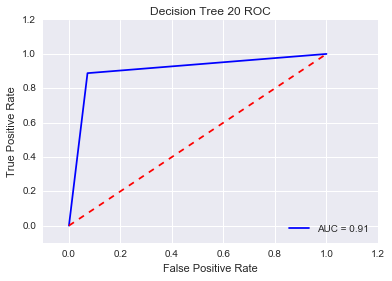

In [18]:
actual = log_dec_export.suspend
pred = log_dec_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Decision Tree 20 ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Naive Bayes

In [19]:
naive_bay.fit(X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']],Y_train)

print 'Naive Baye model accuracy: ' + str(naive_bay.score(X_test[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_test))

Naive Baye model accuracy: 0.74358974359


In [20]:
log_naive_export = pd.DataFrame(naive_bay.predict_proba(X[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_requested',
 'Concept_increased',
 'Concept_failed',
 'Concept_net',
 'Concept_estimate',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']]))
log_naive_export['company'] = df.company
log_naive_export['symbol'] = df.symbol
log_naive_export['suspend'] = df.suspend
log_naive_export

,0,1,company,symbol,suspend
0,0.265831,7.341691e-01,OXiGENE,OXGN,1
1,0.999989,1.120915e-05,PendrellCorporation,PCO,1
2,0.999999,1.048044e-06,PhotoMedex,PHMD,1
3,0.993879,6.121205e-03,PrimaBioMedLtd,PBMD,1
4,0.236473,7.635265e-01,PrismTechnologiesGroup,PRZM,1
5,0.969864,3.013621e-02,ProfessionalDiversityNetwork,IPDN,1
6,0.273464,7.265359e-01,QKLStores,QKLS,1
7,0.106647,8.933534e-01,QualstarCorporation,QBAK,1
8,0.571157,4.288429e-01,QuestResourceHoldingCorporation,QRHC,1
9,0.474760,5.252404e-01,RadaElectronicsIndustriesLimited,RADA,1


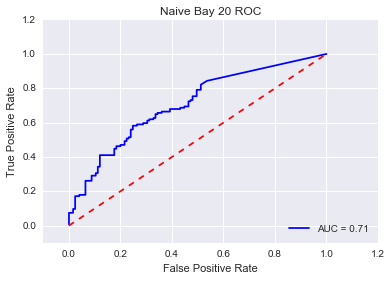

In [21]:
actual = log_naive_export.suspend
pred = log_naive_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Naive Bay 20 ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-NN

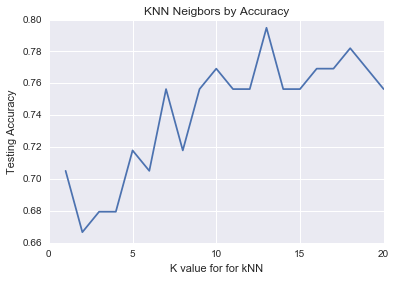

In [22]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    k_near_n = KNeighborsClassifier(n_neighbors= k)
    k_near_n.fit(X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_train)
    Y_pred = k_near_n.predict(X_test[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']])
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

plt.title('KNN Neigbors by Accuracy')
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

In [23]:
k_near_n = KNeighborsClassifier(n_neighbors= 2)
k_near_n.fit(X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_train)
print 'KNN model accuracy: ' + str(k_near_n.score(X_test[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_test))

KNN model accuracy: 0.666666666667


In [24]:
log_knn_export = pd.DataFrame(k_near_n.predict_proba(X[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']]))
log_knn_export['company'] = df.company
log_knn_export['symbol'] = df.symbol
log_knn_export['suspend'] = df.suspend
log_knn_export

,0,1,company,symbol,suspend
0,0.5,0.5,OXiGENE,OXGN,1
1,0.5,0.5,PendrellCorporation,PCO,1
2,0.5,0.5,PhotoMedex,PHMD,1
3,0.0,1.0,PrimaBioMedLtd,PBMD,1
4,0.0,1.0,PrismTechnologiesGroup,PRZM,1
5,0.5,0.5,ProfessionalDiversityNetwork,IPDN,1
6,0.0,1.0,QKLStores,QKLS,1
7,0.0,1.0,QualstarCorporation,QBAK,1
8,0.0,1.0,QuestResourceHoldingCorporation,QRHC,1
9,0.0,1.0,RadaElectronicsIndustriesLimited,RADA,1


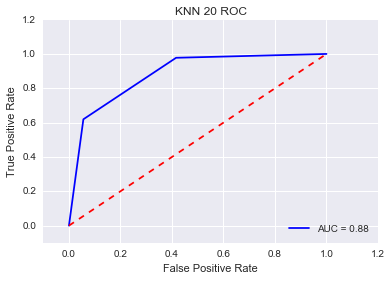

In [25]:
actual = log_knn_export.suspend
pred = log_knn_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('KNN 20 ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [26]:
rand_for.fit(X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_train)

rand_for_df = pd.DataFrame()

rand_for_df['Feature'] = X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']].columns
rand_for_df['Rank'] = rand_for.feature_importances_
rand_for_df.sort_values('Rank', inplace= True)

In [27]:
print 'Random forest model accuracy: ' + str(rand_for.score(X_test[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_test))

Random forest model accuracy: 0.794871794872


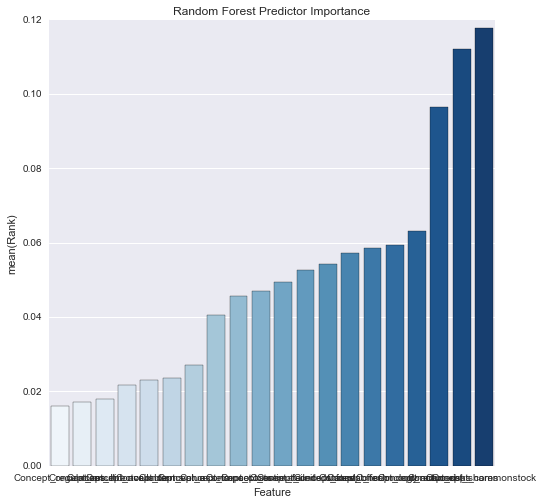

In [28]:
plt.figure(figsize=(8,8))
plt.title('Random Forest Predictor Importance')
sns.barplot(x= 'Feature', y = 'Rank', data = rand_for_df, palette= 'Blues')

In [29]:
log_rf_export = pd.DataFrame(rand_for.predict_proba(X[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_unitedstates',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']]))
log_rf_export['company'] = df.company
log_rf_export['symbol'] = df.symbol
log_rf_export['suspend'] = df.suspend
log_rf_export

,0,1,company,symbol,suspend
0,0.0,1.0,OXiGENE,OXGN,1
1,0.1,0.9,PendrellCorporation,PCO,1
2,0.0,1.0,PhotoMedex,PHMD,1
3,0.2,0.8,PrimaBioMedLtd,PBMD,1
4,0.3,0.7,PrismTechnologiesGroup,PRZM,1
5,0.2,0.8,ProfessionalDiversityNetwork,IPDN,1
6,0.1,0.9,QKLStores,QKLS,1
7,0.3,0.7,QualstarCorporation,QBAK,1
8,0.0,1.0,QuestResourceHoldingCorporation,QRHC,1
9,0.3,0.7,RadaElectronicsIndustriesLimited,RADA,1


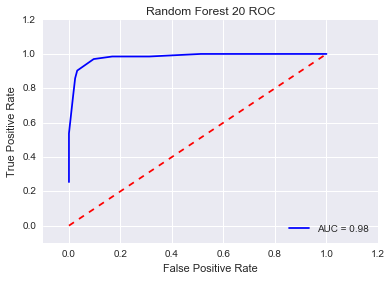

In [30]:
actual = log_rf_export.suspend
pred = log_rf_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Random Forest 20 ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Bagging Classifier

In [31]:
bag_class_RFE = RFE(dec_tree, 20)
bag_class_RFE.fit(X_train[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_tableofcontents',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_market',
 'Concept_increased',
 'Concept_clinicaltrials',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_agreement',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']], Y_train)

bag_class_RFE_df = pd.DataFrame()

bag_class_RFE_df['Rank'] = bag_class_RFE.ranking_
bag_class_RFE_df['Feature'] = X_train[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_tableofcontents',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_market',
 'Concept_increased',
 'Concept_clinicaltrials',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_agreement',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']].columns
bag_class_RFE_df['Support'] = bag_class_RFE.support_
BG20df = bag_class_RFE_df[bag_class_RFE_df.Support == True]
#BG20 = BG20df['Feature'].tolist()
#BG20

In [32]:
print 'Bagging Cassifier accuracy: ' + str(bag_class_RFE.score(X_test[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_tableofcontents',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_market',
 'Concept_increased',
 'Concept_clinicaltrials',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_agreement',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']], Y_test))

Bagging Cassifier accuracy: 0.692307692308


In [33]:
log_bg_export = pd.DataFrame(bag_class_RFE.predict_proba(X[['Concept_regulations',
 'Concept_ended',
 'Concept_impact',
 'Concept_tableofcontents',
 'Concept_amount',
 'Concept_unableto',
 'Concept_sales',
 'Concept_available',
 'Concept_shares',
 'Concept_assets',
 'Concept_market',
 'Concept_increased',
 'Concept_clinicaltrials',
 'Concept_handling',
 'Concept_investment',
 'Concept_costs',
 'Concept_agreement',
 'Concept_offer',
 'Concept_expense',
 'Concept_commonstock']]))
log_bg_export['company'] = df.company
log_bg_export['symbol'] = df.symbol
log_bg_export['suspend'] = df.suspend
log_bg_export

,0,1,company,symbol,suspend
0,0,1,OXiGENE,OXGN,1
1,1,0,PendrellCorporation,PCO,1
2,0,1,PhotoMedex,PHMD,1
3,0,1,PrimaBioMedLtd,PBMD,1
4,1,0,PrismTechnologiesGroup,PRZM,1
5,0,1,ProfessionalDiversityNetwork,IPDN,1
6,0,1,QKLStores,QKLS,1
7,0,1,QualstarCorporation,QBAK,1
8,0,1,QuestResourceHoldingCorporation,QRHC,1
9,0,1,RadaElectronicsIndustriesLimited,RADA,1


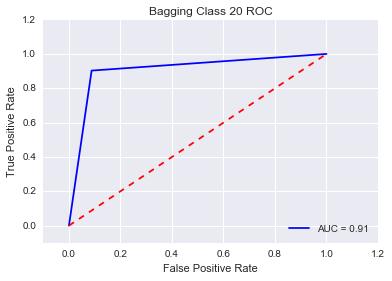

In [34]:
actual = log_bg_export.suspend
pred = log_bg_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Bagging Class 20 ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Prediction

In [52]:
dfpred = pd.read_excel('pridicition20.xlsx')

In [53]:
columnspred = list(dfpred)

In [54]:
columnspred.remove('Path')

In [55]:
columnspred.remove('suspend')

In [56]:
X = dfpred[columns]
Y = dfpred.suspend
Y = np.ravel(Y)

KeyError: "[u'Concept_common stock'] not in index"

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print len(X_train), len(Y_train), len(X_test), len(Y_test)

178 178 77 77


In [51]:
log_reg_RFE = RFE(log_reg, 20)
log_reg_RFE.fit(X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']], Y_train)

log_reg_RFE_df = pd.DataFrame()

log_reg_RFE_df['Rank'] = log_reg_RFE.ranking_
log_reg_RFE_df['Feature'] = X_train[['Concept_technology',
 'Concept_risks',
 'Concept_terms',
 'Concept_regulations',
 'Concept_impact',
 'Concept_reduced',
 'Concept_value',
 'Concept_contract',
 'Concept_available',
 'Concept_director',
 'Concept_shares',
 'Concept_assets',
 'Concept_funds',
 'Concept_result',
 'Concept_failed',
 'Concept_estimate',
 'Concept_costs',
 'Concept_offer',
 'Concept_commonstock']].columns
log_reg_RFE_df['Support'] = log_reg_RFE.support_
LGdf = log_reg_RFE_df[log_reg_RFE_df.Support == True]
#LG20 = LGdf['Feature'].tolist()


KeyError: "['Concept_commonstock'] not in index"